[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 300, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,042,305 (3.98 MB)

 Trainable params: 1,042,305 (3.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 145s 566ms/step - accuracy: 0.7049 - loss: 1.1322 - val_accuracy: 0.8745 - val_loss: 0.3536
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 200s 559ms/step - accuracy: 0.9134 - loss: 0.2843 - val_accuracy: 0.8845 - val_loss: 0.3210
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 150s 600ms/step - accuracy: 0.9295 - loss: 0.2449 - val_accuracy: 0.8786 - val_loss: 0.3272
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 202s 600ms/step - accuracy: 0.9386 - loss: 0.2207 - val_accuracy: 0.8789 - val_loss: 0.3348
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 201s 596ms/step - accuracy: 0.9489 - loss: 0.1929 - val_accuracy: 0.8750 - val_loss: 0.3420
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8800 - loss: 0.3296

Test Accuracy: 0.8770


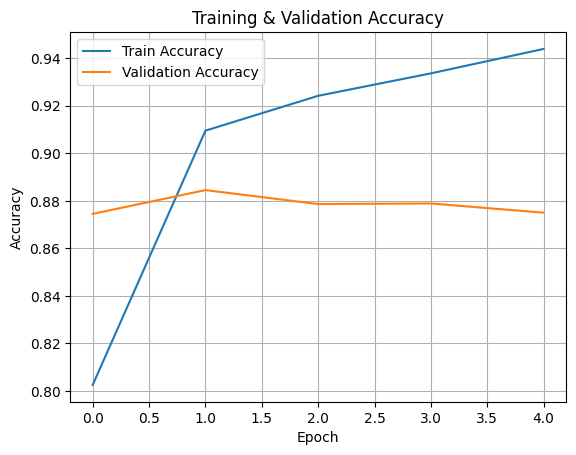

In [4]:
# 🎬 IMDB Sentiment Analysis using LSTM

# STEP 1: Install Required Libraries
!pip install numpy pandas matplotlib seaborn nltk tensorflow --quiet

# STEP 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2

# STEP 3: Load Dataset
file_path = '/content/IMDB Dataset.csv'
df = pd.read_csv(file_path)
df.head()

# STEP 4: Clean the Reviews
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['clean_review'] = df['review'].apply(clean_text)
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# STEP 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_review'], df['label'], test_size=0.2, random_state=42)

# STEP 6: Tokenization and Padding
max_words = 10000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# STEP 7: Build LSTM Model with L2 Regularization
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
model.add(LSTM(64, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))
model.build(input_shape=(None, max_len))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# STEP 8: Train the Model
history = model.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=128,
    verbose=1
)

# STEP 9: Evaluate the Model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

# STEP 10: Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()



In [7]:
model.save("/content/imdb_sentiment_lstm_model.h5")